In [1]:
# File: linear_regression_one_varialbe
# Name: 
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum((theta1 * (x[i]**3) + theta2 * (x[i]**2) + theta3 * x[i] + b - y[i])**2 for i in range(len(x)))/ (2*len(x)) 
        

In [4]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [5]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum((theta1 * (x[i]**3) + theta2 * (x[i]**2) + theta3 * x[i] + b - y[i])*(x[i]**3) for i in range(len(x)))/len(x) 

In [6]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [7]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
     return sum((theta1 * (x[i]**3) + theta2 * (x[i]**2) + theta3 * x[i] + b - y[i])*(x[i]**2) for i in range(len(x)))/len(x)

In [8]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [9]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
     return sum((theta1 * (x[i]**3) + theta2 * (x[i]**2) + theta3 * x[i] + b - y[i])*(x[i]) for i in range(len(x)))/len(x)

In [10]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [11]:
def dJ_db(theta1, theta2, theta3, b, x, y):
     return sum((theta1 * (x[i]**3) + theta2 * (x[i]**2) + theta3 * x[i] + b - y[i]) for i in range(len(x)))/len(x)

In [12]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [13]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [14]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [15]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [16]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

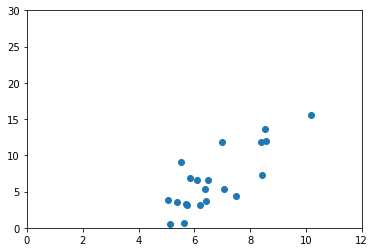

In [17]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [18]:
# Please perform feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x_max = max(x)
x_min = min(x)
x = list((x[i]-x_min)/(x_max-x_min) for i in range(len(x))) 
y_max = max(y)
y_min = min(y)
y = list((y[i]-y_min)/(y_max-y_min) for i in range(len(x)))  

In [19]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

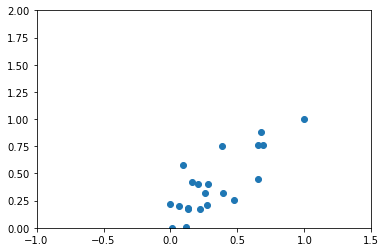

In [20]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [21]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [22]:
theta1 = 0.5
theta2 = 0.6
theta3 = 0.7
b = 1


In [23]:
# ---------- Initialize your alpha ---------- #

In [24]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [25]:
alpha = 0.1

In [26]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [27]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)
    # G.D
    theta1 = theta1 - alpha * dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 = theta2 - alpha * dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 = theta3 - alpha * dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b = b - alpha * dJ_db(theta1, theta2, theta3, b, x, y)


In [28]:
# ---------- Cost changes during training process ---------- #

In [29]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.5294955041386179, 0.41764061973341865, 0.3301526747620061, 0.2617203547955684, 0.20819025499635974, 0.1663144279036873, 0.13355297410472833, 0.10791967435025648, 0.08786127848133564, 0.07216311276335828, 0.05987526728896379, 0.05025487629486544, 0.042720982610808776, 0.036819242506227354, 0.032194325435866124, 0.028568330981775795, 0.025723911087006546, 0.023491071715952036, 0.021736851748254127, 0.020357251816202376, 0.019270922563272796, 0.018414228748883692, 0.017737389253610254, 0.017201458434289323, 0.016775965415368747, 0.016437067890351112, 0.01616610827623469, 0.015948484515397612, 0.015772766939858365, 0.015630007564625965, 0.015513199868837776, 0.015416856266308425, 0.015336677616747582, 0.015269294719839122, 0.015212066106445325, 0.015162919860146937, 0.015120229875953173, 0.015082719053809293, 0.015049383559557468, 0.015019433564631549, 0.014992246875686063, 0.01496733264733298, 0.014944302982697206, 0.014922850704758864, 0.01490273195547843, 0.014883752572220627, 0.0148

In [30]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: 0.5, theta2: 0.6, theta3: 0.7, b: 1


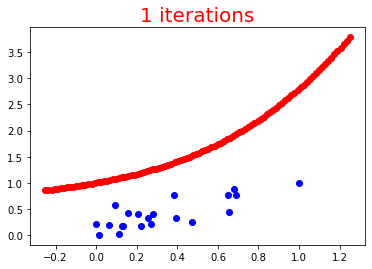

In [31]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.3988772819757271, theta2: 0.4647291239358998, theta3: 0.48129047110860923, b: 0.4390793790470639


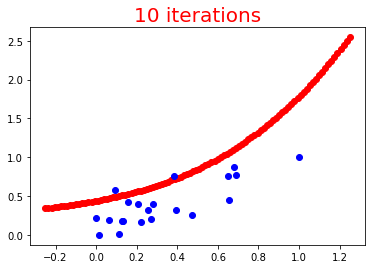

In [32]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.35546437226320293, theta2: 0.4100858911708029, theta3: 0.39988735213817966, b: 0.24758952526723269


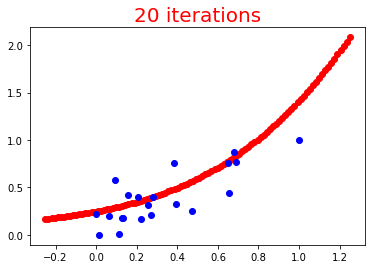

In [33]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [34]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.3353814819535299, theta2: 0.3875111671623299, theta3: 0.37189375977448397, b: 0.19562120447596132


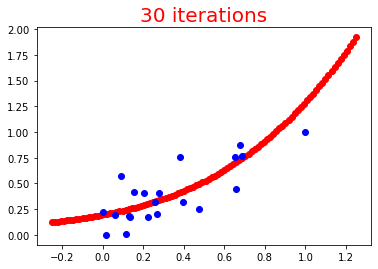

In [35]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.3229497284681612, theta2: 0.37519740375444566, theta3: 0.36033134756077895, b: 0.18383572525997507


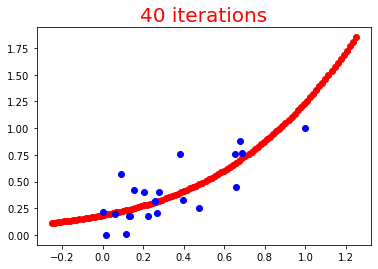

In [36]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

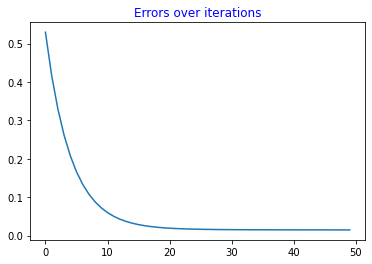

In [37]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')